In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.8 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Mon Feb  2 09:57:37 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   34C    P0             50W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
from zipfile import ZipFile

zip_path="/content/drive/MyDrive/dataset/archive (8).zip"
extract_path="/content/dataset"

with ZipFile(zip_path,"r") as zip:
  zip.extractall(extract_path)



In [ ]:
import yaml

with open("/content/dataset/9 Facial Expressions you need/data.yaml","r") as f:
  data=yaml.safe_load(f)

print("data loaded")

data loaded


In [ ]:
print(data["names"])
print(data["nc"])
print(data["test"])

['angry', 'contempt', 'disgust', 'fear', 'happy', 'natural', 'sad', 'sleepy', 'surprised']
9
../test/images


In [ ]:
from ultralytics import YOLO

model=YOLO("yolo12m.pt")

model.train(
    data="/content/dataset/9 Facial Expressions you need/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16,
    device=0,
    lr0=0.001,
    name="yolo12_custom",
    project="runs/train"
)

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/9 Facial Expressions you need/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo12_custom2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0e00d9fec0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [ ]:
! yolo detect predict \
model=/content/runs/detect/runs/train/yolo12_custom2/weights/best.pt \
source="/content/dataset/9 Facial Expressions you need/valid/images"

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
YOLOv12m summary (fused): 169 layers, 20,111,851 parameters, 0 gradients, 67.1 GFLOPs

image 1/1720 /content/dataset/9 Facial Expressions you need/valid/images/096b101cd34c08b79bb0e6aec2b3afb5-tears-of-sadness-tears-of-joy_jpg.rf.de1b709ae28ceab9222d741813088133.jpg: 640x448 1 sad, 87.3ms
image 2/1720 /content/dataset/9 Facial Expressions you need/valid/images/0a3a21be68414f07a0e035671e8e3911c7376b4cfc6e100c8a1e240423676188_-_20_-_-_20201206192953-001-015_jpg.rf.45b80e7f3c8d2f3a5294f30e4cf7a5df.jpg: 640x640 1 happy, 16.6ms
image 3/1720 /content/dataset/9 Facial Expressions you need/valid/images/0a3a21be68414f07a0e035671e8e3911c7376b4cfc6e100c8a1e240423676188_-_20_-_-_20201206192953-001-015_jpg.rf.7561b7a536390777ad678264e9a59608.jpg: 640x640 1 happy, 14.8ms
image 4/1720 /content/dataset/9 Facial Expressions you need/valid/images/0a3a21be68414f07a0e035671e8e3911c7376b4cfc6e100c8a1e240423676188_

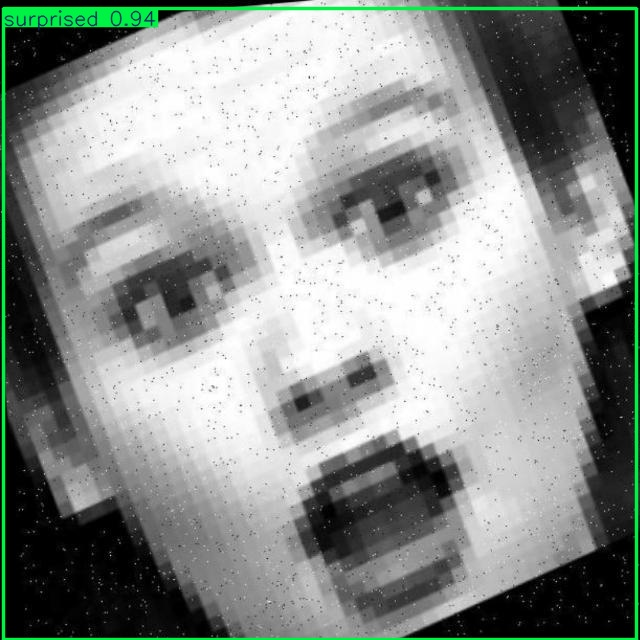

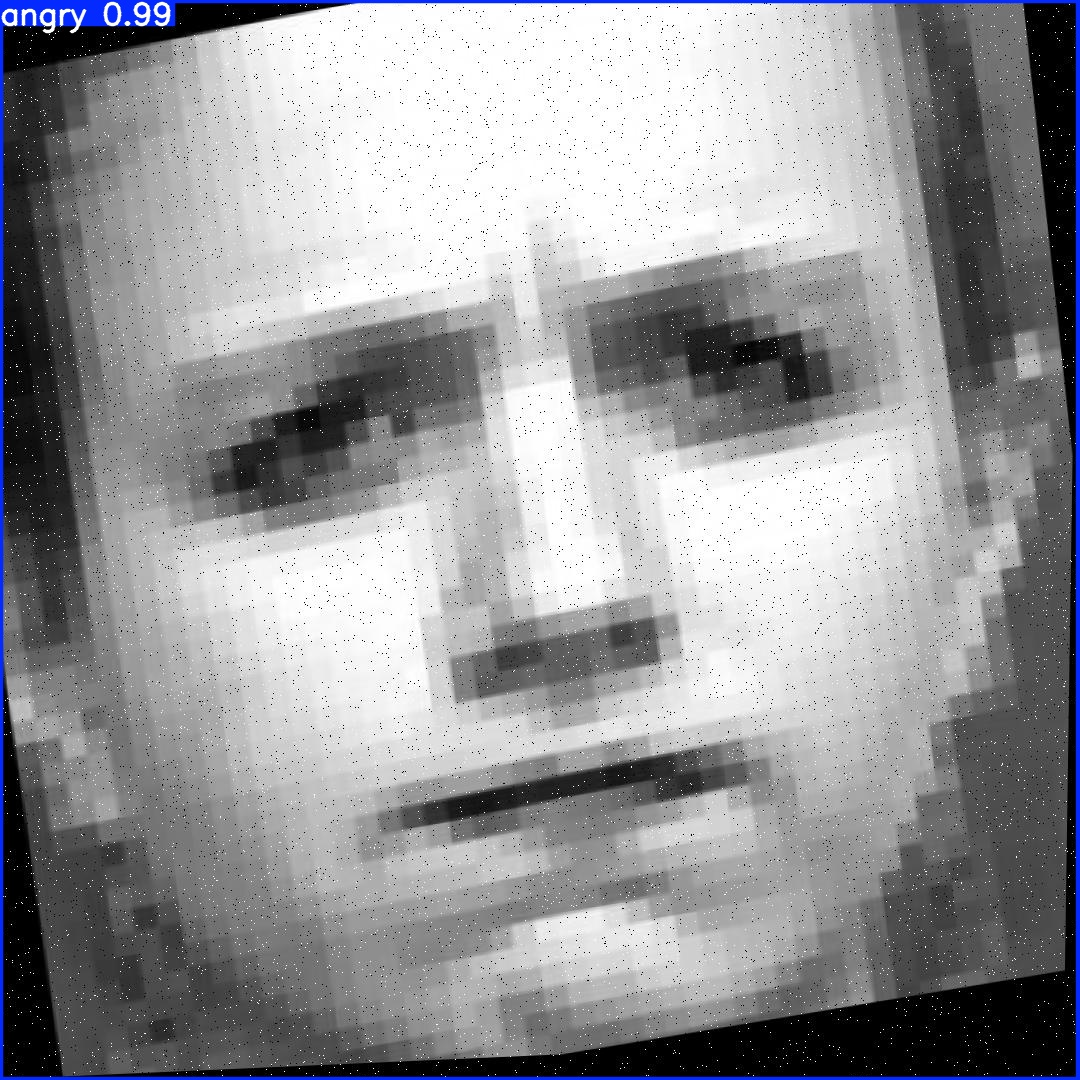

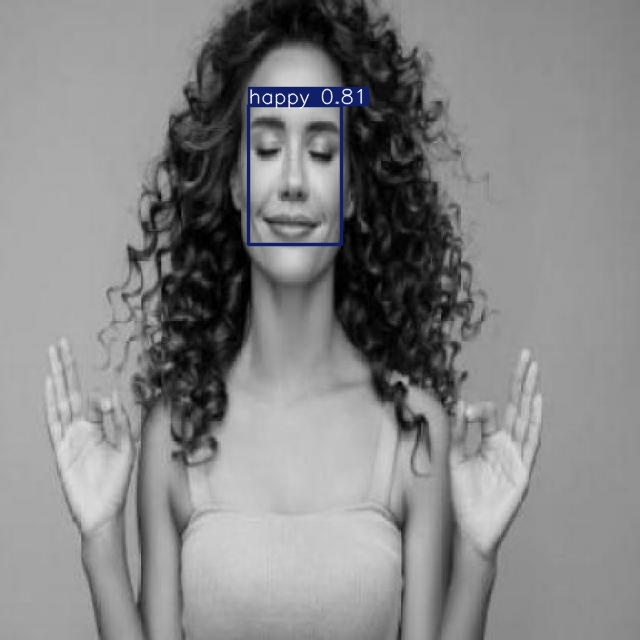

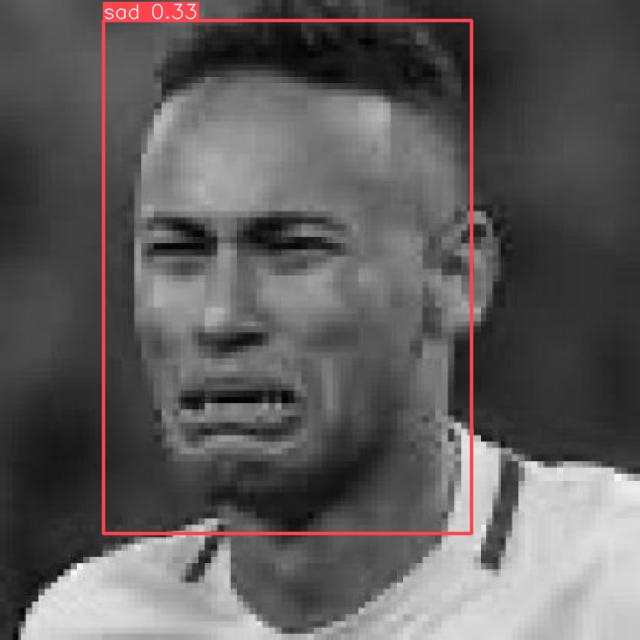

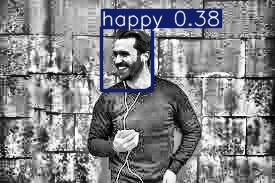

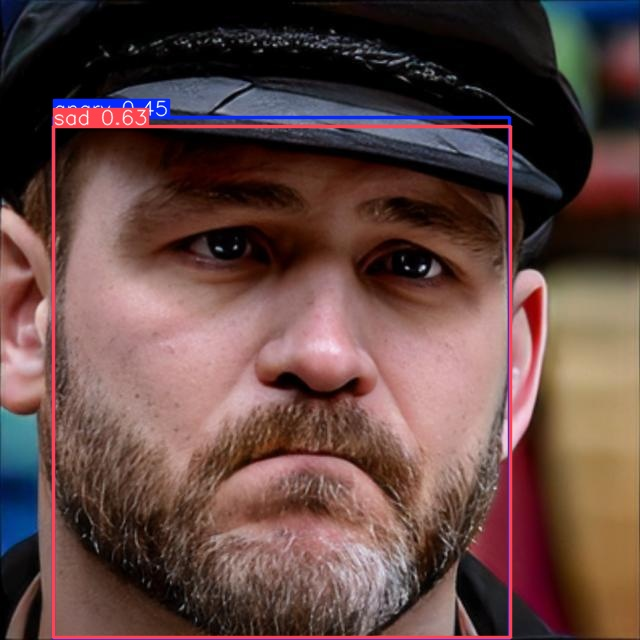

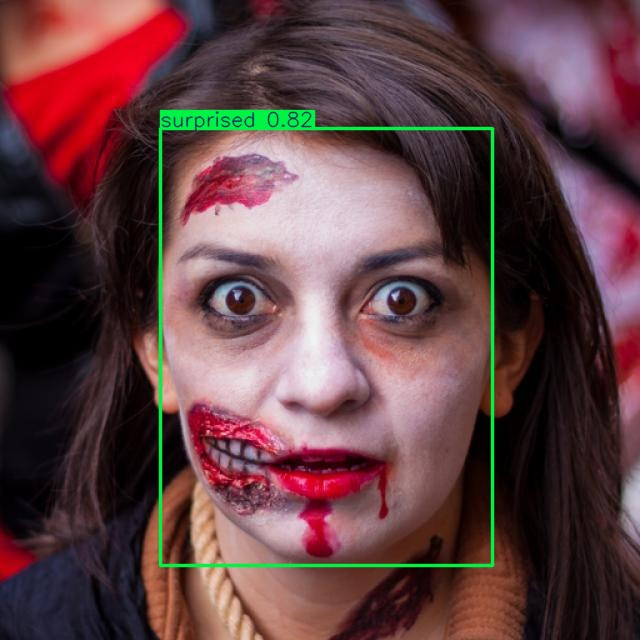

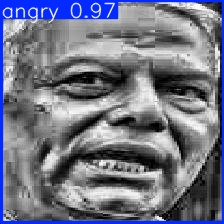

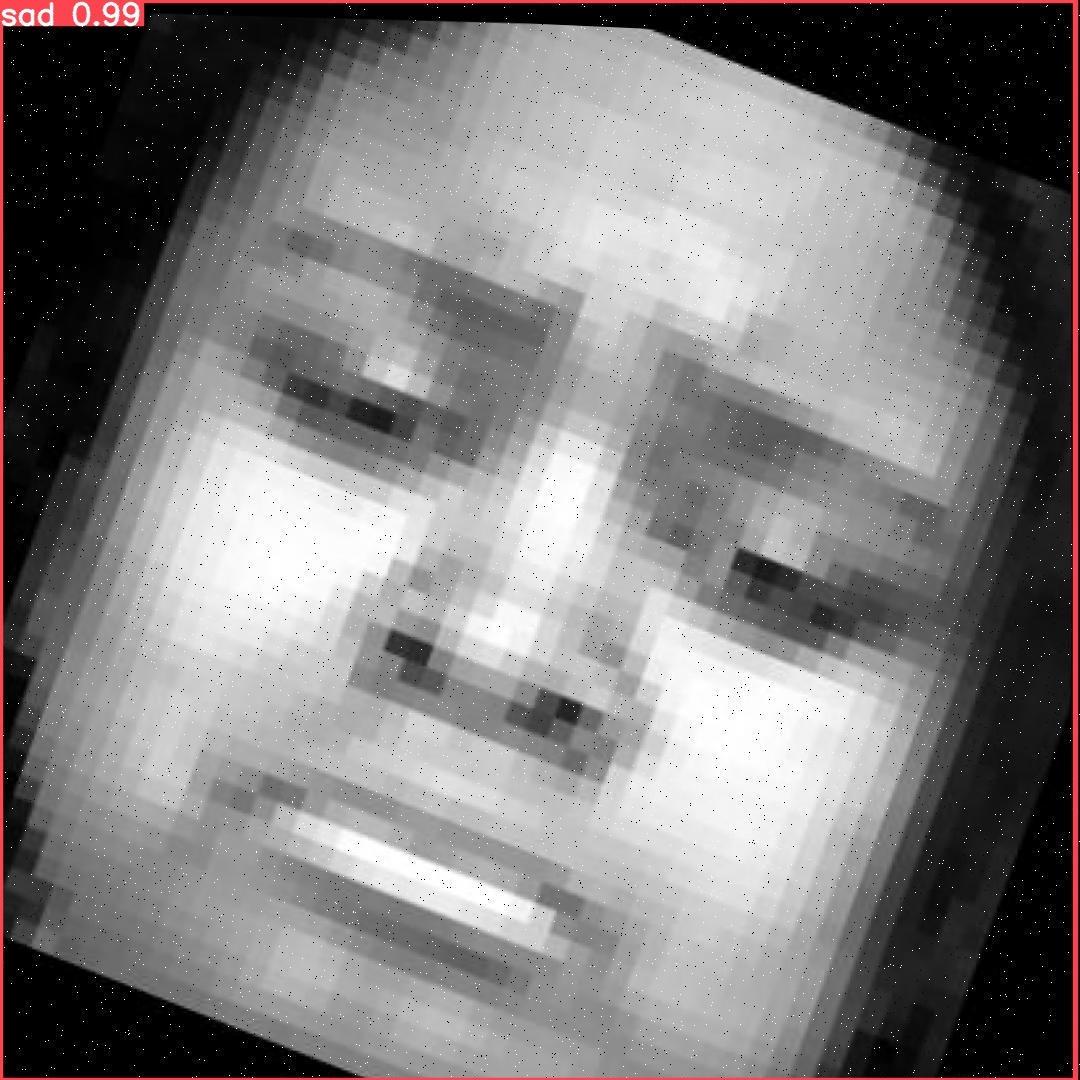

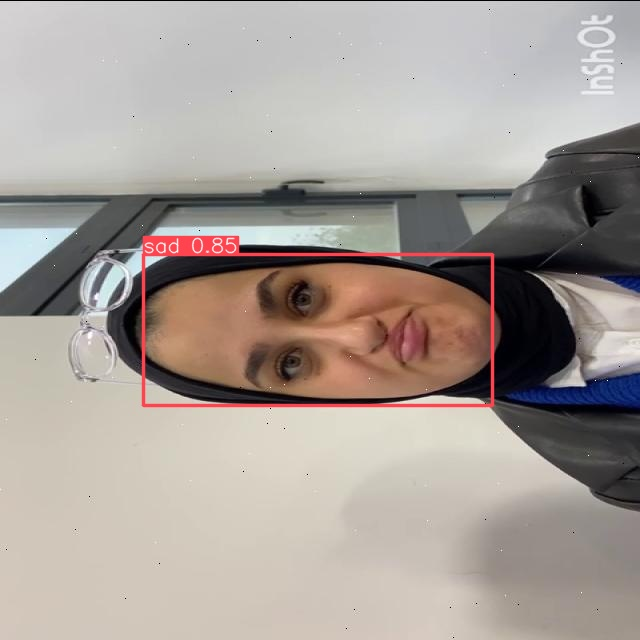

In [ ]:
import glob
from IPython.display import Image, display

for file_path in glob.glob("/content/runs/detect/predict/*.jpg")[:10]:
    display(Image(filename=file_path, height=400))
    print("\n")

In [ ]:
!mkdir /content/FER_model

!cp /content/runs/detect/runs/train/yolo12_custom2/weights/best.pt /content/FER_model/model.pt
!cp -r /content/runs/detect/runs/train /content/FER_model

%cd FER_model


mkdir: cannot create directory ‘/content/FER_model’: File exists
/content/FER_model
[Errno 2] No such file or directory: 'FER_model'
/content/FER_model
updating: model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/yolo12_custom2/ (stored 0%)
  adding: train/yolo12_custom2/labels.jpg (deflated 38%)
  adding: train/yolo12_custom2/BoxR_curve.png (deflated 6%)
  adding: train/yolo12_custom2/train_batch0.jpg (deflated 10%)
  adding: train/yolo12_custom2/BoxF1_curve.png (deflated 5%)
  adding: train/yolo12_custom2/weights/ (stored 0%)
  adding: train/yolo12_custom2/weights/last.pt (deflated 8%)
  adding: train/yolo12_custom2/weights/best.pt (deflated 8%)
  adding: train/yolo12_custom2/results.png (deflated 7%)
  adding: train/yolo12_custom2/train_batch2.jpg (deflated 13%)
  adding: train/yolo12_custom2/confusion_matrix_normalized.png (deflated 15%)
  adding: train/yolo12_custom2/train_batch1.jpg (deflated 11%)
  adding: train/yolo12_custom2/val_batch1_labels.jpg (deflated 11%

In [ ]:

%cd FER_model
!zip /content/FER_model.zip model.pt
!zip -r /content/FER_model.zip train
%cd /content

/content/FER_model
  adding: model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/yolo12_custom2/ (stored 0%)
  adding: train/yolo12_custom2/labels.jpg (deflated 38%)
  adding: train/yolo12_custom2/BoxR_curve.png (deflated 6%)
  adding: train/yolo12_custom2/train_batch0.jpg (deflated 10%)
  adding: train/yolo12_custom2/BoxF1_curve.png (deflated 5%)
  adding: train/yolo12_custom2/weights/ (stored 0%)
  adding: train/yolo12_custom2/weights/last.pt (deflated 8%)
  adding: train/yolo12_custom2/weights/best.pt (deflated 8%)
  adding: train/yolo12_custom2/results.png (deflated 7%)
  adding: train/yolo12_custom2/train_batch2.jpg (deflated 13%)
  adding: train/yolo12_custom2/confusion_matrix_normalized.png (deflated 15%)
  adding: train/yolo12_custom2/train_batch1.jpg (deflated 11%)
  adding: train/yolo12_custom2/val_batch1_labels.jpg (deflated 11%)
  adding: train/yolo12_custom2/results.csv (deflated 65%)
  adding: train/yolo12_custom2/BoxPR_curve.png (deflated 9%)
  adding: tr

In [ ]:
from google.colab import files

files.download("/content/FER_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>